In [157]:
import pandas as pd

In [158]:
df = pd.read_csv("weather_data.csv")

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [160]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [161]:
df['date'] = pd.to_datetime(df['date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity         296 non-null    float64       
 3   avg_wind_speed   296 non-null    float64       
 4   rain_or_not      311 non-null    object        
 5   cloud_cover      296 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.1+ KB


None

In [162]:
df.isnull().sum()

,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']] = imputer.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']])

In [164]:
df.isnull().sum()

,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0


In [165]:
df.describe()

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,311,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2023-06-05 00:00:00,25.983840,55.041385,7.556636,49.834827,1001.059119
min,2023-01-01 00:00:00,15.000000,30.000000,0.069480,0.321826,951.240404
25%,2023-03-19 12:00:00,20.493383,35.686194,3.711684,25.955498,975.757545
50%,2023-06-05 00:00:00,25.983840,55.041385,7.556636,49.834827,1001.938586
75%,2023-08-21 12:00:00,31.858688,71.978037,10.897166,74.162107,1026.578884
max,2023-11-07 00:00:00,35.000000,90.000000,56.636041,99.834751,1049.543752
std,NaN,6.635859,18.749365,5.213773,28.298916,28.835595


In [166]:
import plotly.express as px

In [167]:
rain_or_not_fig = px.bar(df, x='rain_or_not')

rain_or_not_fig.show()

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()
df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']] = scaler.fit_transform(df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']])

In [170]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,-0.337868,-0.475473,0.055586,Rain,-1.025852,992.965681
1,2023-01-02,0.610800,0.258302,-0.417679,Rain,1.529894,1037.273025
2,2023-01-03,0.359444,-0.191075,1.076073,Rain,-1.351986,1034.193357
3,2023-01-04,0.236535,-0.103508,-0.320814,Rain,1.129427,968.610142
4,2023-01-05,-0.353883,0.148767,0.901443,Rain,-0.416676,1030.264331


In [171]:
df[['pressure']] = scaler.fit_transform(df[['pressure']])

In [172]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,-0.337868,-0.475473,0.055586,Rain,-1.025852,-0.281128
1,2023-01-02,0.610800,0.258302,-0.417679,Rain,1.529894,1.257899
2,2023-01-03,0.359444,-0.191075,1.076073,Rain,-1.351986,1.150926
3,2023-01-04,0.236535,-0.103508,-0.320814,Rain,1.129427,-1.127123
4,2023-01-05,-0.353883,0.148767,0.901443,Rain,-0.416676,1.014450


In [173]:
df['rain_or_not'].unique()

array(['Rain', 'No Rain'], dtype=object)

In [174]:
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1 , 'No Rain': 0})
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,-0.337868,-0.475473,0.055586,1,-1.025852,-0.281128
1,2023-01-02,0.610800,0.258302,-0.417679,1,1.529894,1.257899
2,2023-01-03,0.359444,-0.191075,1.076073,1,-1.351986,1.150926
3,2023-01-04,0.236535,-0.103508,-0.320814,1,1.129427,-1.127123
4,2023-01-05,-0.353883,0.148767,0.901443,1,-0.416676,1.014450


In [175]:
features = ['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover', 'pressure']

In [176]:
X = df[features]
y = df.rain_or_not

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
from sklearn.linear_model import LogisticRegression

param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}  # Different values for regularization strength

logreg = LogisticRegression()

grid_logreg = GridSearchCV(logreg, param_grid_log, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

print("Best Parameters:", grid_logreg.best_params_)
print("Best Accuracy:", grid_logreg.best_score_)

Best Parameters: {'C': 1}
Best Accuracy: 0.6822386679000925


In [180]:
best_logreg = grid_logreg.best_estimator_  # Get the best model
y_pred_logreg = best_logreg.predict(X_test)

In [181]:
Comparison_df = pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred_logreg})
Comparison_df

,Actual,Predicted
212,1,0
146,0,1
225,0,0
129,1,1
89,1,0
...,...,...
233,1,1
108,0,0
156,1,1
124,1,1


In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

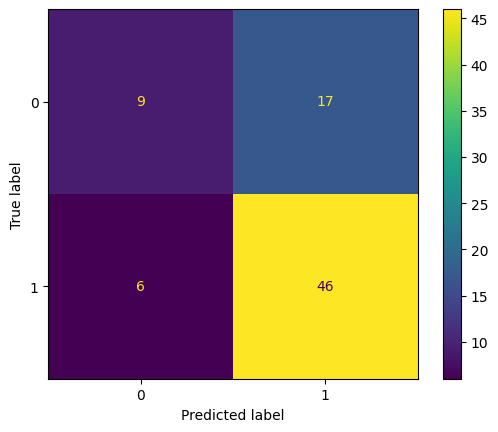

In [183]:
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred_logreg, labels=best_logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=best_logreg.classes_)

disp.plot()

In [184]:
from sklearn.metrics import accuracy_score

In [185]:
accuracy = accuracy_score(y_test,y_pred_logreg)

print ('Model Accuracy:',accuracy)

Model Accuracy: 0.7051282051282052


In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        26
           1       0.73      0.88      0.80        52

    accuracy                           0.71        78
   macro avg       0.67      0.62      0.62        78
weighted avg       0.69      0.71      0.68        78



In [187]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 10],         # Maximum depth of trees
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.652358926919519


In [188]:
best_rf = grid_rf.best_estimator_  # Get the best model
y_pred_rf = best_rf.predict(X_test)

In [189]:
Comparison_df = pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred_rf})
Comparison_df

,Actual,Predicted
212,1,0
146,0,1
225,0,0
129,1,1
89,1,0
...,...,...
233,1,1
108,0,1
156,1,1
124,1,1


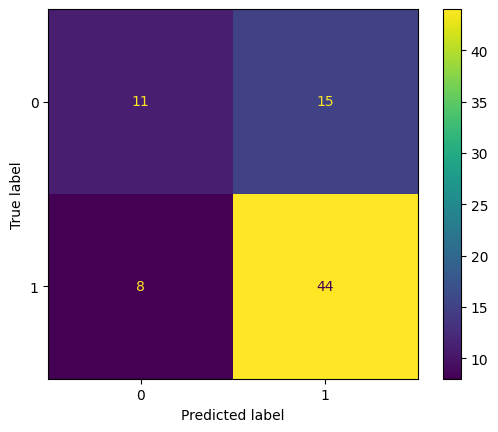

In [190]:
cm = confusion_matrix(y_test, y_pred_rf, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=best_rf.classes_)

disp.plot()

In [191]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49        26
           1       0.75      0.85      0.79        52

    accuracy                           0.71        78
   macro avg       0.66      0.63      0.64        78
weighted avg       0.69      0.71      0.69        78



In [192]:
import numpy as np

In [193]:
future_days = 21

# Generate random future weather data based on dataset statistics
future_data = pd.DataFrame({
    'avg_temperature': np.random.normal(df['avg_temperature'].mean(), df['avg_temperature'].std(), future_days),
    'humidity': np.random.normal(df['humidity'].mean(), df['humidity'].std(), future_days),
    'avg_wind_speed': np.random.normal(df['avg_wind_speed'].mean(), df['avg_wind_speed'].std(), future_days),
    'cloud_cover': np.random.normal(df['cloud_cover'].mean(), df['cloud_cover'].std(), future_days),
    'pressure': np.random.normal(df['pressure'].mean(), df['pressure'].std(), future_days),
})

display(future_data.head())

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
0,-0.880986,-0.188883,0.841448,-0.170101,0.471723
1,-1.374960,-0.235535,0.699852,-0.104524,0.014558
2,1.409236,-2.330811,-0.065548,-0.526006,0.455268
3,0.368199,-1.041390,0.710988,-0.122402,0.690943
4,0.100258,0.789385,-1.449752,0.541333,-0.785033


In [194]:
# Predict probabilities (Rain or No Rain)
rain_probabilities = best_logreg.predict_proba(future_data)[:,1]  # Probability of rain

# Add predictions to DataFrame
future_data['Rain_Probability'] = rain_probabilities

# Add dates for clarity
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=future_days)
future_data['Date'] = future_dates

# Show results
display(future_data[['Date', 'Rain_Probability']])


,Date,Rain_Probability
0,2023-11-08,0.718235
1,2023-11-09,0.679212
2,2023-11-10,0.284068
3,2023-11-11,0.580019
4,2023-11-12,0.597896
5,2023-11-13,0.485034
6,2023-11-14,0.441018
7,2023-11-15,0.911173
8,2023-11-16,0.281074
9,2023-11-17,0.697172
